<a href="https://colab.research.google.com/github/LatiefDataVisionary/eda-college-task/blob/main/EDA_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas EDA Pertemuan 8: Membuat Grafik Multivariat**

Disusun Oleh:
  -  Lathif Ramadhan       (5231811022)

Judul Dataset: **Diamonds** (Analyze diamonds by their `cut`, `color`, `clarity`, `price`, and other attributes).

Link Dataset: https://www.kaggle.com/datasets/shivam2503/diamonds/data



## **1. Mengimpor Library yang diperlukan**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats

## **2. Mengunggah file dari lokal ke Colab dan membaca dataset**


In [9]:
from google.colab import files

# Unggah file "diamonds.csv"
uploaded = files.upload()

Saving diamonds_dirty.csv to diamonds_dirty.csv


In [3]:
df = pd.read_csv('diamonds_dirty.csv')

## **3. Lihat ringkasan data (Statistika Descriptif)**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  48517 non-null  float64
 1   carat       48545 non-null  float64
 2   cut         48546 non-null  object 
 3   color       48624 non-null  object 
 4   clarity     48336 non-null  object 
 5   depth       48518 non-null  float64
 6   table       48640 non-null  float64
 7   price       48564 non-null  float64
 8   x           48610 non-null  float64
 9   y           48542 non-null  float64
 10  z           48558 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.5+ MB


### **Penjelasan Ouput:**
1. **Jumlah Data**: Dataset memiliki **53.940 baris** (entri) dan **11 kolom**.
    *   Dataset memiliki **53.940 baris**, diberi penomoran dari 0 hingga 53.939.
    *   Data Columns Dataset terdiri dari **11 kolom**, di mana: **8 kolom** bertipe **float64** (**angka desimal**). **3 kolom** bertipe **object** (**string/kategorikal**).

2. **Non-Null Count** : Setiap kolom memiliki jumlah non-null (data tidak kosong) yang berbeda-beda, menunjukkan adanya missing values di beberapa kolom:
  - Kolom `Unnamed: 0` memiliki **48.514** data tidak kosong, artinya **5.426** data kosong (9,98%).
  - Kolom `carat` memiliki **48.542** data tidak kosong, artinya **5.398** data kosong (**9,94%**).
  - Kolom `cut` memiliki **48.543** data tidak kosong, artinya **5.397** data kosong (**9,94%**).
  - Kolom `color` memiliki **48.621** data tidak kosong, artinya **5.319** data kosong (**9,85%**).
  - Kolom `clarity` memiliki **48.333** data tidak kosong, artinya **5.607** data kosong (**10,39%**).
  - Kolom `depth` memiliki **48.515** data tidak kosong, artinya **5.425** data kosong (**9,98%**).
  - Kolom `table` memiliki **48.637** data tidak kosong, artinya **5.303** data kosong (9,83%).
  - Kolom `price` memiliki **48.563** data tidak kosong, artinya **5.377** data kosong (9,93%).
  - Kolom `x` memiliki **48.607** data tidak kosong, artinya **5.333** data kosong (**9,88%**).
  - Kolom `y` memiliki **48.539** data tidak kosong, artinya **5.401** data kosong (**9,94%**).
  - Kolom `z` memiliki **48.556** data tidak kosong, artinya **5.384** data kosong (**9,94%**).

3. **Dtype (Tipe Data)**
  - **float64 (angka desimal/numerik)**:
    - Kolom: `Unnamed: 0`, `carat`, `depth`, `table`, `price`, `x`, `y`, `z`.
    - Biasanya digunakan untuk representasi data numerik seperti ukuran dan harga.
  - **object (kategorikal/string)**:
    - Kolom: `cut`, `color`, `clarity`(tingkat kejernihan berlian).
    - Berisi data non-numerik seperti kategori atau deskripsi.


In [12]:
df.head(200)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.0,0.23,Ideal,E,SI2,61.5,NaN,326.0,3.95,3.98,NaN
1,2.0,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3.0,0.23,Good,E,VS1,56.9,65.0,NaN,4.05,4.07,NaN
3,3.0,0.23,Good,E,VS1,56.9,65.0,NaN,4.05,4.07,NaN
4,4.0,0.29,Premium,I,NaN,62.4,58.0,334.0,4.20,NaN,2.63
...,...,...,...,...,...,...,...,...,...,...,...
195,193.0,0.70,Premium,E,VS2,61.1,NaN,2777.0,5.71,5.64,3.47
196,194.0,0.70,Premium,E,SI1,60.0,59.0,2777.0,NaN,5.75,3.46
197,195.0,0.70,NaN,E,SI1,61.2,57.0,2777.0,5.73,5.68,3.49
198,196.0,0.70,Premium,E,SI1,62.7,59.0,2777.0,5.67,5.63,3.54


In [6]:
(df.isnull().sum() / len(df)) * 100

,0
Unnamed: 0,10.058766
carat,10.006859
cut,10.005005
color,9.860408
clarity,10.394305
depth,10.056912
table,9.830747
price,9.971637
x,9.886362
y,10.012421


In [7]:
# Menghitung jumlah missing value
missing_count = df.isnull().sum()

# Menghitung persentase missing value dan format output
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage.map("{:.2f}%".format)

# Membuat DataFrame untuk menampilkan hasil
missing_info = pd.DataFrame({'Jumlah Missing Value': missing_count, 'Persentase Missing Value': missing_percentage})

missing_info

,Jumlah Missing Value,Persentase Missing Value
Unnamed: 0,5426,10.06%
carat,5398,10.01%
cut,5397,10.01%
color,5319,9.86%
clarity,5607,10.39%
depth,5425,10.06%
table,5303,9.83%
price,5379,9.97%
x,5333,9.89%
y,5401,10.01%


### **Penjelasan Ouput:**

Kolom-kolom dataset:

* `Unnamed: 0`: Kolom indeks numerik, berasal dari file CSV, ini sebenarnya kolom tanpa nama(tanpa string). Sebagian datanya hilang (missing values).
* `carat`: Berat berlian dalam karat (**0.2--5.01**). Kolom ini cukup lengkap tetapi mungkin memiliki missing values.
* `cut`: Kualitas potongan berlian (**Fair**, **Good**, **Very Good**, **Premium**, **Ideal**), beberapa datanya hilang (missing values).
* `color`: Warna berlian (e.g., **E**, **F**, **G**) from **J** (worst) to **D** (best), terdapat missing values.
* `clarity`: Kejernihan berlian (**I1** (worst), **SI2**, **SI1**, **VS2**, **VS1**, **VVS2**, **VVS1**, **IF** (best)), beberapa nilai hilang.
* `depth`: Persentase kedalaman berlian` percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)`, menunjukkan banyak nilai kosong.
* `table`: Lebar bagian atas berlian (**43--95**), beberapa nilai kosong.
* `price`: Harga berlian dalam dolar AS (**\$326--\$18,823**), sebagian besar nilainya lengkap.
* `x`, `y`, `z`: Dimensi berlian dalam milimeter (**panjang**, **lebar**, **tinggi/kedalaman**), beberapa memiliki nilai kosong atau tidak valid.
  * `x`: length in mm (**0--10.74**)
  * `y`: width in mm (**0--58.9**)
  * `z`: depth in mm (**0--31.8**)

In [14]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,48517.000000,48545.000000,48518.000000,48640.000000,48564.000000,48610.000000,48542.000000,48558.000000
mean,26919.847249,0.797511,61.747286,57.455687,4127.775842,5.732348,5.735006,3.539978
std,15582.768377,0.473204,1.434863,2.225081,7134.380978,1.120648,1.118808,0.707582
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13389.000000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26888.000000,0.700000,61.800000,57.000000,2401.500000,5.700000,5.710000,3.530000
75%,40441.000000,1.040000,62.500000,59.000000,5345.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,79.000000,188230.000000,10.740000,31.800000,31.800000


In [5]:
df.isnull().sum()

,0
Unnamed: 0,5426
carat,5398
cut,5397
color,5319
clarity,5607
depth,5425
table,5303
price,5379
x,5333
y,5401


In [9]:
# Pilih kolom numerik yang ingin dicek outliernya
kolom_numerik = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Menghitung IQR (Interquartile Range)
Q1 = df[kolom_numerik].quantile(0.25)
Q3 = df[kolom_numerik].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan bawah untuk outlier
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

# Mencari outlier
outliers = ((df[kolom_numerik] < batas_bawah) | (df[kolom_numerik] > batas_atas)).any(axis=1)

# Menampilkan data yang mengandung outlier
df[outliers]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2,3.0,0.23,Good,E,VS1,56.9,65.0,NaN,4.05,4.07,NaN
3,3.0,0.23,Good,E,VS1,56.9,65.0,NaN,4.05,4.07,NaN
10,9.0,0.22,Fair,E,VS2,65.1,61.0,337.0,3.87,3.78,NaN
27,25.0,0.31,Very Good,J,SI1,58.1,62.0,353.0,4.44,4.47,2.59
38,36.0,0.23,Good,F,VS1,58.2,59.0,402.0,4.06,4.08,2.37
...,...,...,...,...,...,...,...,...,...,...,...
53885,53883.0,0.71,Fair,D,VS1,65.4,59.0,2747.0,5.62,5.58,NaN
53889,53887.0,0.70,Good,D,VS2,58.0,62.0,2749.0,5.78,5.87,3.38
53893,53891.0,0.73,Good,E,SI1,57.9,55.0,2749.0,NaN,5.96,3.46
53898,53896.0,0.70,Good,NaN,VS1,57.8,61.0,2751.0,5.83,5.79,3.36


In [16]:
outliers.sum()  # Menampilkan jumlah total outlier

5986

In [18]:
# Mengecek jumlah baris duplikat
print(f"Jumlah baris yang duplikat: {df.duplicated().sum()}")

Jumlah baris yang duplikat: 3


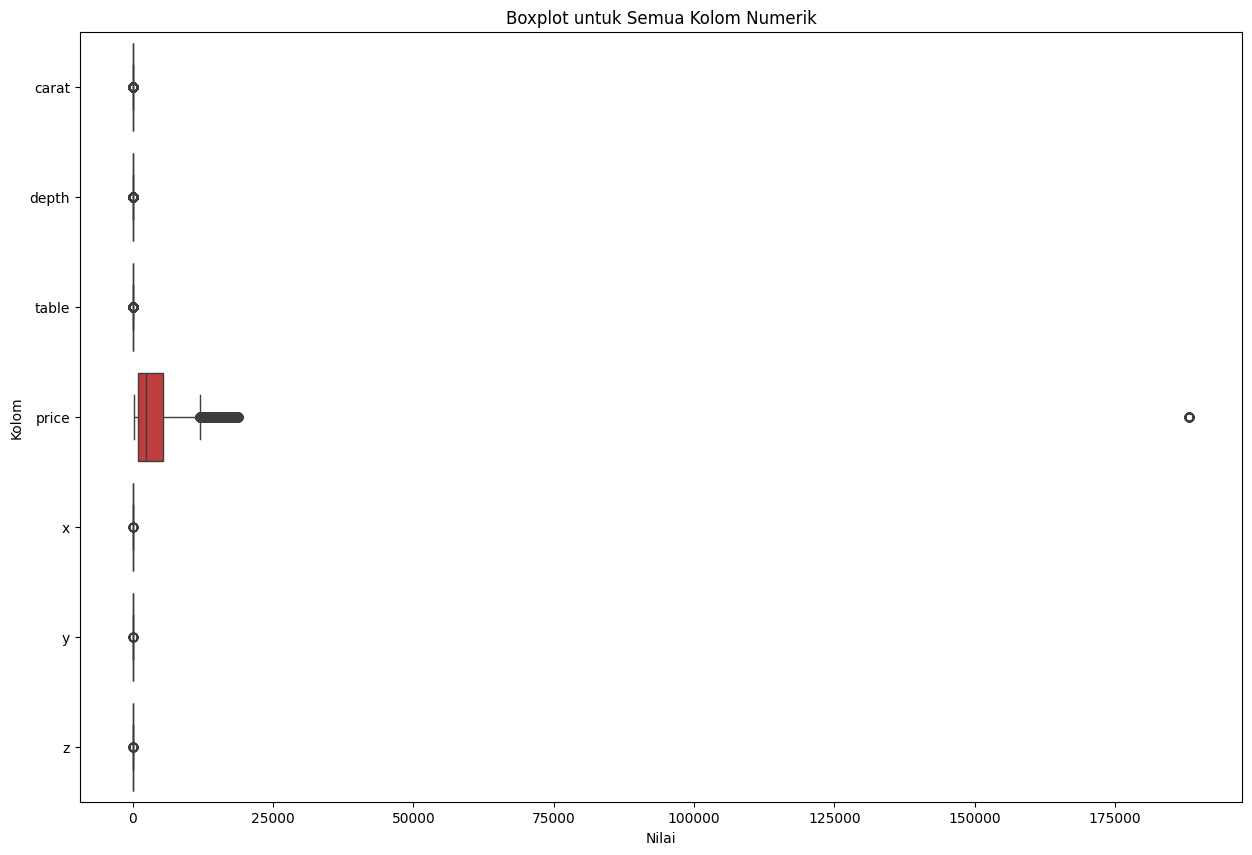

In [19]:
# Pilih kolom numerik
kolom_numerik = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Buat boxplot untuk semua kolom numerik
plt.figure(figsize=(15, 10))  # Atur ukuran figure
sns.boxplot(data=df[kolom_numerik], orient="h")  # Orientasi horizontal untuk tampilan yang lebih baik
plt.title('Boxplot untuk Semua Kolom Numerik')
plt.xlabel('Nilai')
plt.ylabel('Kolom')
plt.show()

## **5. Buat Grafik Multivariat/Exploratory Data Analysis(EDA) untuk Data Kotor**

### **A. Analisis Korelasi Antar Variabel Numerik Menggunakan Heatmap**

**Apa itu Heatmap Korelasi?**

Heatmap korelasi adalah visualisasi yang menunjukkan kekuatan dan arah hubungan antara variabel numerik dalam sebuah dataset. Pada gambar grafik heatmap diatas, setiap kotak mewakili korelasi antara dua variabel berlian. Warna pada kotak menunjukkan kekuatan korelasi:

- **Warna merah**: Korelasi **positif** yang kuat (semakin merah, semakin kuat hubungan positifnya). Artinya, jika nilai satu variabel naik, nilai variabel lainnya cenderung naik juga.
- **Warna biru**: Korelasi **negatif** yang kuat (semakin biru, semakin kuat hubungan negatifnya). Artinya, jika nilai satu variabel naik, nilai variabel lainnya cenderung turun.
- **Warna mendekati putih**: Korelasi yang **lemah** atau tidak ada korelasi.

Nilai numerik pada setiap kotak menunjukkan koefisien korelasi, yang berkisar antara -1 hingga 1. Semakin dekat nilai ke 1 atau -1, semakin kuat korelasinya.

**Apa fungsi Heatmap pada kasus ini?**

Heatmap pada kasus ini berfungsi untuk:

* **Menunjukkan Hubungan Antar Variabel**:
  * Memvisualisasikan kekuatan dan arah hubungan antar variabel numerik dalam dataset.
  * Nilai korelasi tinggi (positif atau negatif) mengindikasikan hubungan kuat antara dua variabel.
* **Mengidentifikasi Pola atau Tren**:
  * Membantu mengidentifikasi pasangan variabel yang memiliki hubungan signifikan atau pola tertentu.
* **Seleksi Fitur untuk Analisis Lanjutan**:
  * Membantu memilih variabel yang saling berkorelasi untuk analisis mendalam atau model prediktif.
* **Deteksi Multikolinearitas**:
  * Membantu memahami jika ada variabel yang terlalu berkorelasi, yang bisa memengaruhi hasil analisis statistik atau model.

**Mengapa Menggunakan Kode Tersebut?**

Kode Python yang digunakan adalah untuk menghasilkan heatmap korelasi ini karena:

1. **Memilih Kolom Numerik**: Baris `numeric_columns` = ['`carat`', '`depth`', '`table`', '`price`', '`x`', '`y`', '`z`'] digunakan untuk memilih hanya kolom-kolom yang berisi data **numerik**. Hal ini penting karena heatmap korelasi hanya bisa diterapkan pada data numerik.
2. **Hitung Matriks Korelasi**: Baris `correlation = df[numeric_columns].corr()` menghitung matriks korelasi dari data yang dipilih. Matriks ini berisi koefisien korelasi antara setiap pasangan variabel.
3. **Buat Heatmap**: Library Seaborn digunakan untuk membuat visualisasi heatmap. Fungsi `sns.heatmap` mengambil matriks korelasi sebagai input, dan parameter `cmap='coolwarm'` menentukan skema warna yang digunakan (**biru** untuk korelasi negatif, **merah** untuk korelasi positif). Parameter `annot=True` menambahkan nilai numerik koefisien korelasi pada setiap kotak.


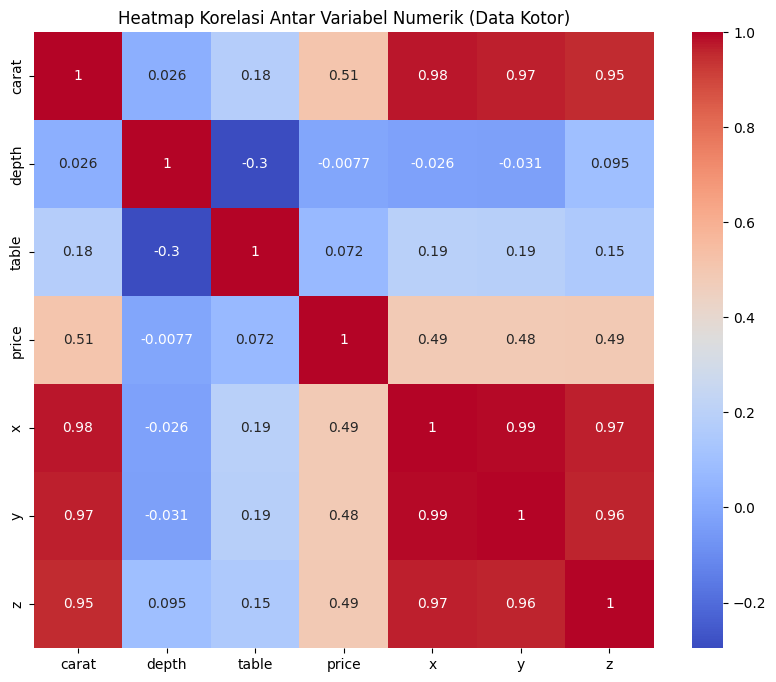

In [ ]:
# Pilih hanya kolom numerik untuk heatmap
numeric_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
correlation = df[numeric_columns].corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Variabel Numerik (Data Kotor)")
plt.show()

### Penjelasan Output
**Interpretasi Hasil**

- `Carat`, `x`, `y`, dan `z` memiliki korelasi **positif** yang sangat kuat: Ini berarti bahwa ukuran berlian (`carat`) sangat terkait dengan dimensi fisiknya (`x`, `y`, `z`). Semakin besar carat, semakin besar pula dimensi fisiknya.
- Harga memiliki korelasi positif yang kuat dengan `carat`, `x`, `y`, dan `z`: Ini menunjukkan bahwa harga berlian sangat dipengaruhi oleh ukurannya. Semakin besar berlian, semakin tinggi harganya.
- `Depth` dan `table` memiliki korelasi yang lemah dengan variabel lainnya: Ini menunjukkan bahwa kedalaman dan lebar table berlian memiliki pengaruh yang lebih kecil terhadap harga atau dimensi fisik dibandingkan dengan `carat`, `x`, `y`, dan `z`.

### **B. Pairplot Hubungan Antar Variabel Numerik: `carat`, `price`, dan `depth`, dengan Kategori `cut`**

**Apa itu Pairplot?**

**Pairplot** adalah jenis visualisasi data yang sangat berguna untuk mengeksplorasi hubungan antara beberapa variabel numerik dalam dataset secara bersamaan. Dengan pairplot, kita dapat melihat distribusi setiap variabel secara individual, serta hubungan pairwise antara setiap pasangan variabel.

**Mengapa menggunakan Pairplot?**

Pairplot digunakan disini untuk memberikan visualisasi hubungan antar **variabel numerik**, dalam hal ini `carat`, `price`, dan `depth`, dengan mempertimbangkan kategori `cut` sebagai pembeda.
Fungsinya adalah:

* **Memahami Pola Hubungan**: Memberikan gambaran awal apakah ada pola hubungan linear, non-linear, atau tidak ada hubungan antara variabel-variabel yang diamati.
* **Analisis Multivariat**: Membantu melihat bagaimana satu variabel dipengaruhi oleh variabel lain dengan mempertimbangkan dimensi tambahan (`cut` sebagai *hue*).
* **Deteksi Outlier**: Membantu mengidentifikasi data yang mungkin tidak wajar atau jauh dari pola umum.
* **Penyederhanaan Interpretasi**: Menggabungkan beberapa scatterplot dalam satu visual untuk mempermudah analisis komprehensif antar variabel.


**Visualisasi ini terdiri dari:**
- **Diagonal**: Histogram atau kernel density estimation (KDE) plot dari setiap variabel. Ini menunjukkan distribusi frekuensi dari masing-masing variabel.
- **Off-diagonal**: Scatter plot yang menunjukkan hubungan antara dua variabel. Warna yang berbeda pada titik-titik data dapat digunakan untuk membedakan kelompok data berdasarkan variabel kategorikal ketiga (dalam kasus ini, '`cut`').

**Kode Python dan Penjelasannya**
- `sns.pairplot`: Fungsi ini dari library Seaborn digunakan untuk membuat pairplot.
- `df`: Merupakan DataFrame yang berisi data berlian.
- `vars=['carat', 'price', 'depth']`: Menentukan variabel-variabel numerik yang akan diplot.
- `hue='cut'`: Membagi data berdasarkan variabel kategorikal '`cut`' dan menampilkannya dengan warna yang berbeda.
- `palette='viridis'`: Menggunakan palet warna '`viridis`' untuk mewarnai plot.
- `plt.title("Pairplot Multivariat")`: Memberikan judul pada plot.

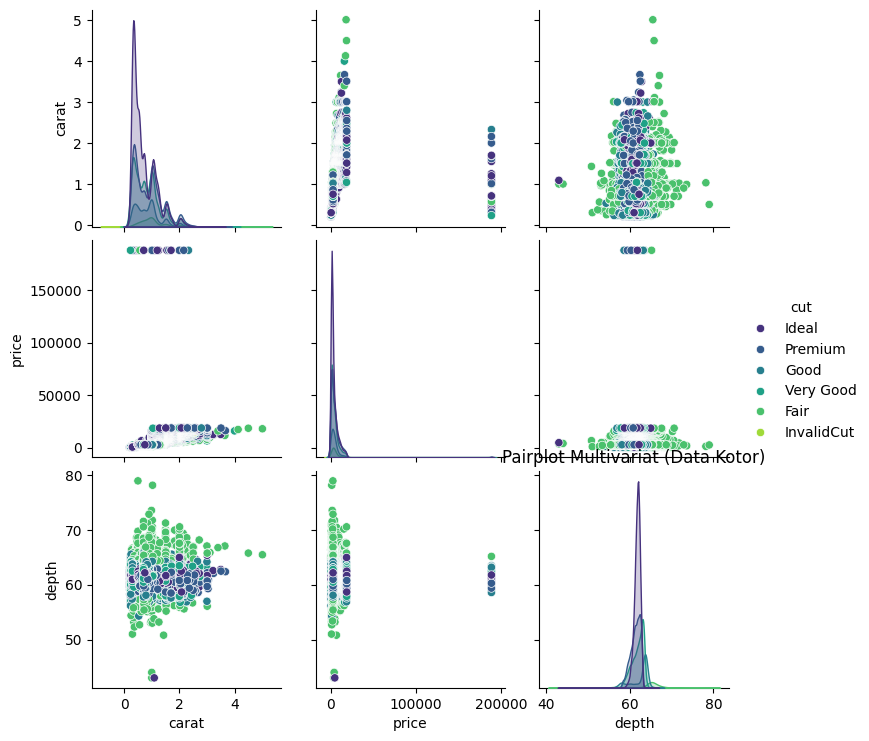

In [ ]:
# Pairplot menggunakan seaborn
sns.pairplot(df, vars=['carat', 'price', 'depth'], hue='cut', palette='viridis')
plt.title("Pairplot Multivariat (Data Kotor)")
plt.show()

### Penjelasan Output

**Interpretasi Pairplot Berlian**
- Hubungan antara `Carat` dan `Harga`:
  - Terdapat korelasi **positif** yang kuat antara carat dan harga. Artinya, semakin besar carat berlian, semakin tinggi harganya.
  - Sebaran data membentuk pola yang cenderung naik dari kiri bawah ke kanan atas pada scatter plot `carat` vs. `price`.
- Distribusi `Harga`:
  - Sebagian besar berlian memiliki harga yang relatif rendah.
  - Terdapat beberapa outlier dengan harga yang sangat tinggi, mungkin karena berlian-berlian tersebut memiliki kualitas yang sangat baik atau memiliki karakteristik unik.
- Hubungan antara `Carat` dan `Depth`:
  - Tidak ada korelasi yang sangat kuat antara `carat` dan `depth`.
  - Sebaran data cenderung menyebar dan tidak membentuk pola yang jelas.
- Pengaruh `Cut` terhadap `Harga`:
  - Berlian dengan cut '`Ideal`' cenderung memiliki harga yang lebih tinggi dibandingkan dengan cut lainnya.
  - Berlian dengan cut '`Fair`' cenderung memiliki harga yang lebih rendah.


### **C. Boxplot Harga Berlian (`price`) Berdasarkan Kategori `cut`**

**Apa itu Boxplot?**

**Boxplot** adalah visualisasi data yang digunakan untuk menunjukkan distribusi suatu variabel numerik, terutama ketika dibandingkan antar kelompok atau kategori. Boxplot memberikan gambaran tentang:
- **Kuartil**: Membagi data menjadi empat bagian yang sama. Kotak pada boxplot merepresentasikan rentang antara kuartil pertama (*Q1*) dan kuartil ketiga (*Q3*).
- **Median**: Garis tengah pada kotak menunjukkan nilai median, yaitu nilai tengah dari data.
- **Jangkauan Antar Kuartil (*IQR*)**: Jarak antara Q1 dan Q3, yang menunjukkan sebaran 50% data di tengah.
- **Kumis**: Garis vertikal yang memanjang dari kotak mewakili rentang data yang masih dianggap masuk akal. Titik-titik di luar kumis (***outliers***) dianggap sebagai data ekstrem.

**Mengapa menggunakan Boxplot?**

Boxplot digunakan disini untuk memahami distribusi dan variasi harga berlian (`price`) berdasarkan kategori `cut`. Fungsinya adalah:

* **Menganalisis Distribusi Data**: Menunjukkan persebaran harga berlian di setiap kategori `cut` (seperti median, kuartil, dan rentang antar-kuartil).
* **Mendeteksi Outlier**: Memvisualisasikan harga berlian yang ekstrem di luar rentang normal, ini dapat membantu mengenali anomali dalam data kotor.
* **Membandingkan Kategori**: Memberikan wawasan apakah kategori `cut` tertentu cenderung memiliki harga lebih tinggi atau lebih rendah dibandingkan kategori lain.
* **Identifikasi Variabilitas**: Membantu melihat seberapa besar variasi harga dalam setiap kategori **cut**, sehingga bisa menentukan stabilitas harga untuk masing-masing kategori.


**Kode Python:**
- `plt.figure(figsize=(12, 6))`: Menentukan ukuran gambar boxplot.
- `sns.boxplot(x='cut', y='price', data=df, palette='Set3')`:
  - ` x='cut'`: Menentukan variabel kategori yang akan digunakan untuk mengelompokkan data.
  - ` y='price'`: Menentukan variabel numerik yang akan divisualisasikan.
  - `data=df`: Spesifikasikan DataFrame yang berisi data.
  - `palette='Set3'`: Menentukan palet warna yang akan digunakan.


<ipython-input-9-330a08baeabd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y='price', data=df, palette='Set3')


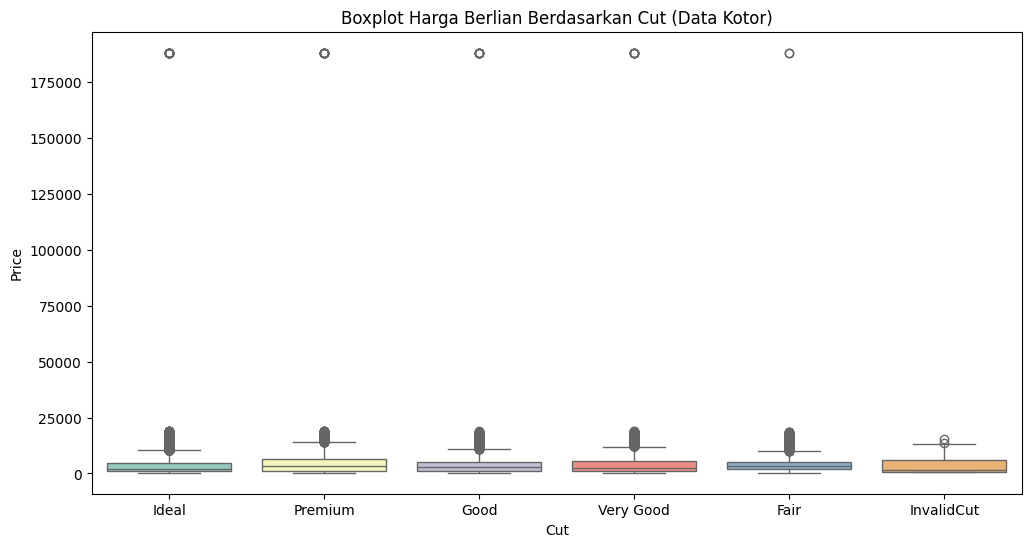

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cut', y='price', data=df, palette='Set3')
plt.title("Boxplot Harga Berlian Berdasarkan Cut (Data Kotor)")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

### Penjelasan Output
**Interpretasi Boxplot Harga Berlian:**
- Harga Berlian (`price`) berdasarkan Kualitas Potongan (`cut`):
  - **Ideal**: Berlian dengan kualitas potongan "Ideal" cenderung memiliki harga median yang lebih tinggi dibandingkan dengan kualitas potongan lainnya. Selain itu, rentang harga (IQR) juga cenderung lebih lebar, yang menunjukkan variasi harga yang lebih besar pada kategori ini.
  - **Premium**, **Very Good**, **Good**: Ketiga kategori ini memiliki pola yang serupa, dengan harga median yang relatif dekat. Namun, terdapat beberapa outlier pada kategori "Premium" yang memiliki harga sangat tinggi.
  - `Fair` dan `InvalidCut`: Kedua kategori ini memiliki harga median yang paling rendah dan rentang harga yang lebih sempit dibandingkan dengan kategori lainnya.
- **Outliers**:
  - Terdapat beberapa outlier pada beberapa kategori, terutama pada kategori "`Premium`" dan "`InvalidCut`". Outliers ini mungkin mewakili berlian dengan karakteristik unik atau kesalahan dalam data.

**Kesimpulan**

Secara umum, boxplot menunjukkan bahwa kualitas potongan ("`cut`") memiliki pengaruh yang signifikan terhadap harga berlian (**price**). Berlian dengan kualitas potongan "`Ideal`" cenderung memiliki harga yang lebih tinggi dan variasi harga yang lebih besar.


### **D. 3D Scatterplot: Carat vs Price vs Depth**

**3D scatterplot** adalah visualisasi tiga dimensi yang digunakan untuk memplot hubungan antara tiga variabel numerik. Sumbu X, Y, dan Z masing-masing mewakili variabel, dan titik-titik dalam grafik menunjukkan hubungan atau pola di antara variabel tersebut.

**Fungsi dalam kasus ini:**

* **Visualisasi Multivariat**: Menampilkan hubungan antara tiga variabel numerik sekaligus, misalnya `carat`, `price`, dan `depth`.
* **Identifikasi Pola**: Mempermudah identifikasi pola atau tren kompleks yang mungkin tidak terlihat dalam visualisasi 2D.
* **Analisis Data Kotor**: Berguna untuk eksplorasi awal, memungkinkan deteksi outlier atau pola anomali sebelum data dibersihkan.

**Penjelasan Kode**
1. Import library: Kita perlu menggunakan library `mpl_toolkits.mplot3d` dari **Matplotlib** untuk membuat scatterplot 3D.
2. Tentukan figure dan subplot: Gunakan `plt.figure` untuk membuat canvas dan `ax = fig.add_subplot(111, projection='3d')` untuk menambahkan subplot 3D ke figure tersebut.
3. Buat scatterplot: Gunakan fungsi `ax.scatter` untuk membuat scatterplot 3D.
  - Parameter` x`, `y`, dan `z` menentukan array data untuk masing-masing sumbu (carat, price, depth).
  - Parameter` c=df['price']` menetapkan warna titik berdasarkan nilai harga (dengan warna yang lebih tinggi menunjukkan harga yang lebih mahal).
  - Parameter` cmap='viridis'` menentukan skema warna yang akan digunakan (viridis digunakan untuk transisi warna dari rendah ke tinggi).
4. Label sumbu: Gunakan `ax.set_xlabel`, `ax.set_ylabel`, dan `ax.set_zlabel` untuk memberi label pada masing-masing sumbu (`carat`, `price`, `depth`).
5. Judul: Tambahkan judul pada plot menggunakan plt.title.
6. Colorbar: Gunakan `plt.colorbar` untuk menampilkan legend warna yang merepresentasikan harga berlian.
7. Tampilkan plot: Gunakan `plt.show` untuk menampilkan scatterplot 3D yang telah dibuat.

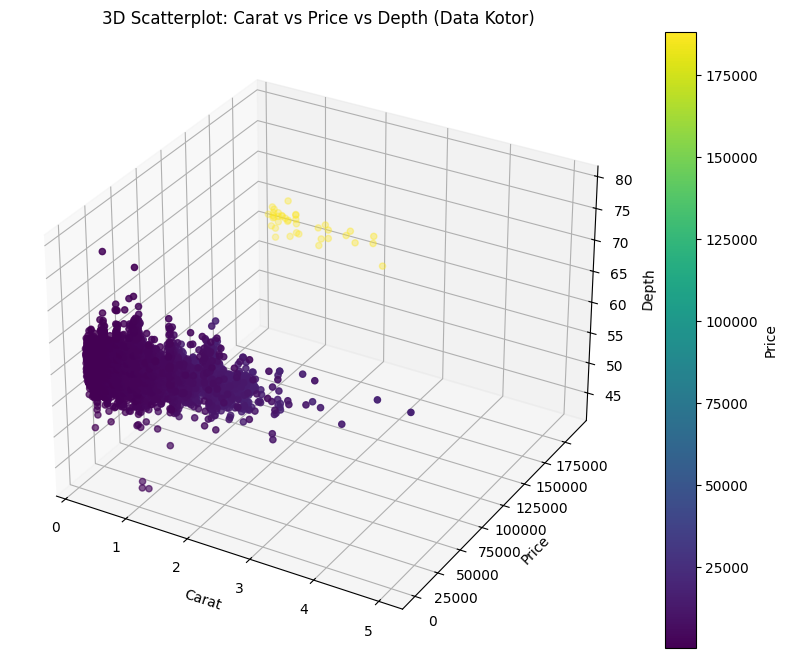

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['carat'], df['price'], df['depth'], c=df['price'], cmap='viridis')
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
ax.set_zlabel('Depth')
plt.title("3D Scatterplot: Carat vs Price vs Depth (Data Kotor)")
plt.colorbar(scatter, label="Price")
plt.show()

## Penjelasan Output

**Interpretasi Scatterplot 3D**

Visualisasi 3D ini memungkinkan kita untuk melihat hubungan antara `carat`, `price`, dan `depth` secara bersamaan. Dengan mengamati warna pada titik-titik data dan memperhatikan posisinya pada ketiga sumbu, kita dapat memperoleh insight tambahan dibandingkan dengan scatterplot 2D biasa. Misalnya:
- **Harga dan Ukuran**: Titik-titik berwarna lebih merah (harga lebih tinggi) cenderung berada pada area dengan nilai carat yang lebih besar. Ini konsisten dengan pemahaman bahwa berlian yang lebih besar umumnya lebih mahal.
- **`Depth` dan Ukuran**: Tidak terlihat pola yang jelas antara `depth` dan `carat`. Artinya, kedalaman tidak selalu mempengaruhi ukuran berlian.

## **6. Data cleaning**


### **A. Baca kembali dataset yang kotor**

In [21]:
df_dirty = pd.read_csv("diamonds_dirty.csv")

### **B. Hapus kolom yang tidak relevan/Feature Selection**

In [22]:
df_clean = df_dirty.drop(columns=["Unnamed: 0"], errors="ignore")

Bagian ini menghapus kolom yang tidak relevan dengan analisis, yaitu kolom `Unnamed: 0`. Kolom ini sering kali muncul sebagai index dari dataset yang disertakan saat mengimpor data. `errors="ignore"` memastikan bahwa tidak ada error jika kolom tersebut tidak ada.


### **C. Tangani missing values**

### Mengisi nilai NaN untuk **kolom numerik** dengan **median**

In [23]:
numerical_cols = df_clean.select_dtypes(include=["float64", "int64"]).columns
df_clean[numerical_cols] = df_clean[numerical_cols].fillna(df_clean[numerical_cols].median())

Kode ini mencari kolom dengan tipe data numerik (`float64`, `int64`) dan mengisi nilai yang hilang (***NaN***) dengan median dari masing-masing kolom. Menggunakan median lebih disukai daripada rata-rata untuk menghindari pengaruh nilai ekstrem (***outlier***).


### Mengisi nilai NaN untuk **kolom kategorikal** dengan **mode**

In [24]:
categorical_cols = df_clean.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

<ipython-input-24-33fbd076af94>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


Untuk kolom dengan tipe data kategorikal (*object*), kode ini mengisi nilai yang hilang dengan nilai modus (nilai yang paling sering muncul) dari masing-masing kolom. Ini membantu untuk mempertahankan distribusi data.


### **D. Tangani outliers**
Outliers pada kolom harga (`price`) yang terlalu tinggi (misalnya `> 3 * IQR`)

In [32]:
Q1 = df_clean["price"].quantile(0.25)
Q3 = df_clean["price"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 3 * IQR
df_clean["price"] = np.where(df_clean["price"] > upper_limit, upper_limit, df_clean["price"])

In [35]:
# Batas rentang yang diinginkan
lower_bound = 0
upper_bound = 25000

# Mengganti nilai di luar rentang dengan batas rentang
df_clean['price'] = np.clip(df_clean['price'], lower_bound, upper_bound)

In [29]:
# Menentukan semua kolom numerik yang akan diproses
kolom_numerik = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Loop melalui setiap kolom numerik
for kolom in kolom_numerik:
    Q1 = df_clean[kolom].quantile(0.25)
    Q3 = df_clean[kolom].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR  # Batas atas
    lower_limit = Q1 - 1.5 * IQR  # Batas bawah

    # Ganti outlier dengan upper/lower limit
    df_clean[kolom] = np.where(df_clean[kolom] > upper_limit, upper_limit,
                                 np.where(df_clean[kolom] < lower_limit, lower_limit,
                                          df_clean[kolom]))

Bagian ini menangani *outliers* di kolom price menggunakan metode *Interquartile Range (**IQR**)*. Outliers didefinisikan sebagai nilai yang lebih besar dari `Q3 + 3 * IQR`. Jika nilai `price` lebih besar dari batas atas ini, maka nilai tersebut akan diganti dengan nilai batas atas.


### **E. Tangani Duplicate Values**

In [26]:
# Menghapus baris duplikat dan menyimpan hasilnya ke DataFrame baru
df_no_duplicates = df.drop_duplicates()

# Menampilkan jumlah baris yang dihapus
print(f"Jumlah baris duplikat yang dihapus: {len(df) - len(df_no_duplicates)}")

# Menampilkan DataFrame baru tanpa duplikat (opsional)
df_no_duplicates.head()

Jumlah baris duplikat yang dihapus: 3


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.0,0.23,Ideal,E,SI2,61.5,NaN,326.0,3.95,3.98,NaN
1,2.0,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3.0,0.23,Good,E,VS1,56.9,65.0,NaN,4.05,4.07,NaN
4,4.0,0.29,Premium,I,NaN,62.4,58.0,334.0,4.20,NaN,2.63
5,5.0,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


### **F. Perbaiki data yang tidak valid**
Validasi kolom '`cut`', '`color`', dan '`clarity`' dengan daftar nilai yang valid

In [27]:
valid_cuts = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
valid_colors = ["D", "E", "F", "G", "H", "I", "J"]
valid_clarities = ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"]

df_clean["cut"] = df_clean["cut"].where(df_clean["cut"].isin(valid_cuts), "Unknown")
df_clean["color"] = df_clean["color"].where(df_clean["color"].isin(valid_colors), "Unknown")
df_clean["clarity"] = df_clean["clarity"].where(df_clean["clarity"].isin(valid_clarities), "Unknown")

Kode ini memvalidasi data pada kolom `cut`, `color`, dan `clarity` berdasarkan nilai-nilai yang sah. Jika ada nilai yang tidak sesuai dengan daftar nilai yang valid, maka akan diganti dengan "Unknown" agar tidak mengganggu analisis.


### **F. Simpan hasil cleaning ke file baru**

In [38]:
output_file_clean = "diamonds_cleaned.csv"
df_clean.to_csv(output_file_clean, index=False)

Kode ini menyimpan dataset yang sudah dibersihkan ke file baru dengan nama `diamonds_cleaned.csv`. `index=False` berarti indeks DataFrame tidak akan disertakan dalam file CSV.


In [ ]:
# Opsional: Unduh file hasil cleaning
from google.colab import files
files.download(output_file_clean)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1. Scatter Plot

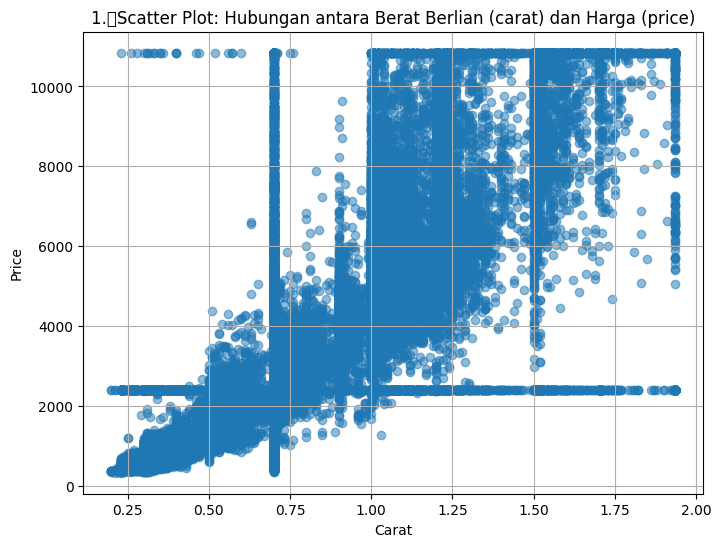

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['carat'], df_clean['price'], alpha=0.5)  # alpha untuk transparansi
plt.title('1.	Scatter Plot: Hubungan antara Berat Berlian (carat) dan Harga (price)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)
plt.show()

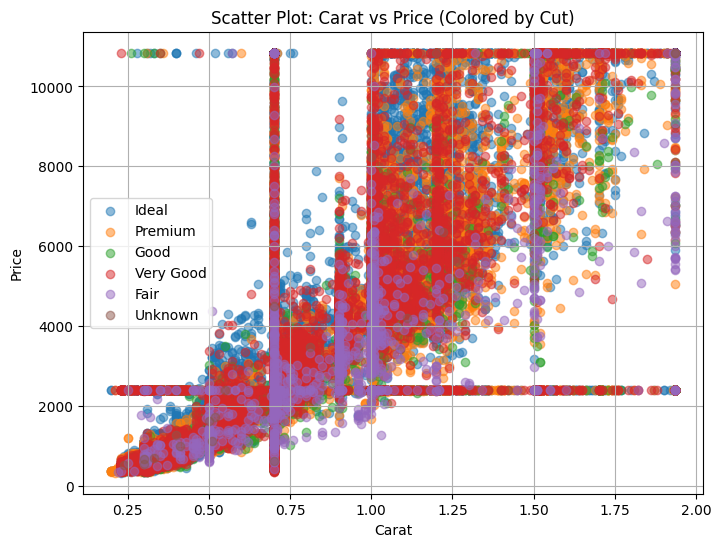

In [41]:
plt.figure(figsize=(8, 6))
for cut in df_clean['cut'].unique():
    plt.scatter(df_clean[df_clean['cut'] == cut]['carat'], df_clean[df_clean['cut'] == cut]['price'], label=cut, alpha=0.5)
plt.title('Scatter Plot: Carat vs Price (Colored by Cut)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

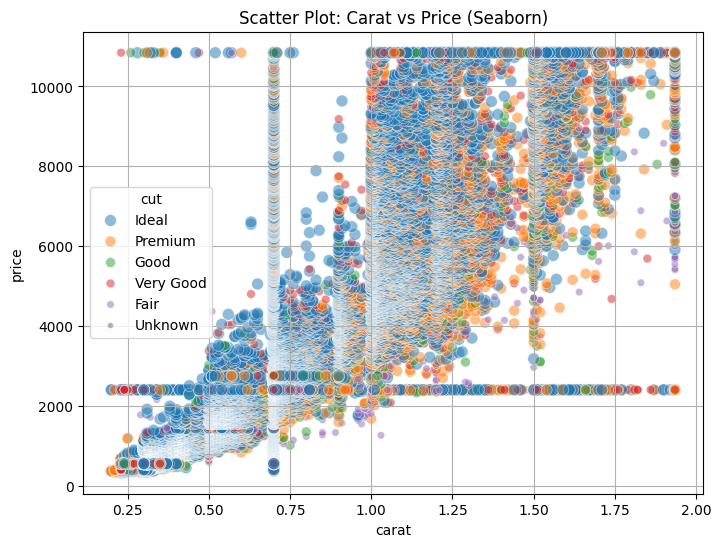

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carat', y='price', hue='cut', size='cut', data=df_clean, alpha=0.5)
plt.title('Scatter Plot: Carat vs Price (Seaborn)')
plt.grid(True)
plt.show()

2. Line Graphs

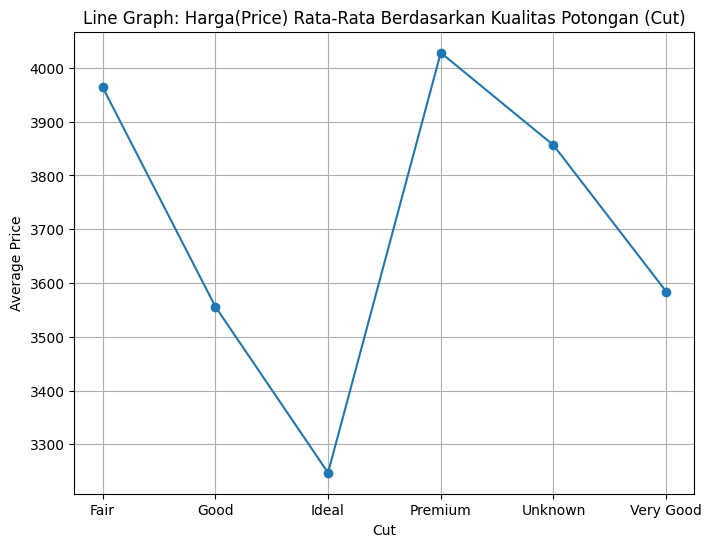

In [47]:
# Menghitung rata-rata harga untuk setiap kategori 'cut'
mean_price_by_cut = df_clean.groupby('cut')['price'].mean()

plt.figure(figsize=(8, 6))
plt.plot(mean_price_by_cut.index, mean_price_by_cut.values, marker='o')  # marker untuk titik data
plt.title('Line Graph: Harga(Price) Rata-Rata Berdasarkan Kualitas Potongan (Cut)')
plt.xlabel('Cut')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

3. Bar Chart

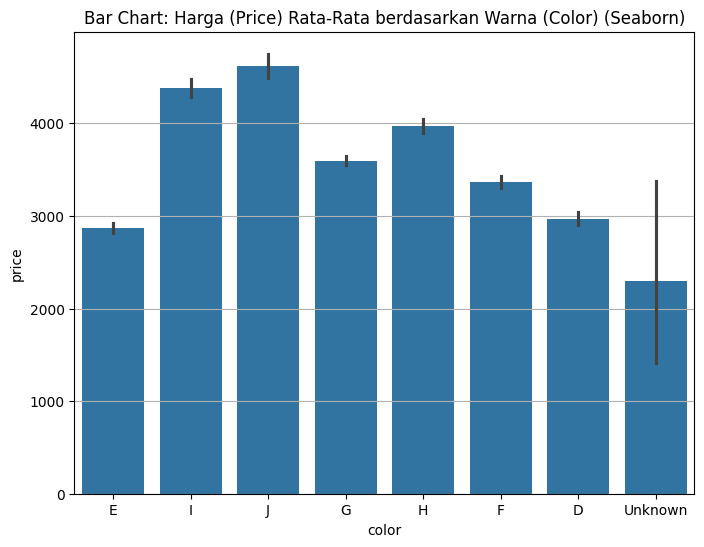

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(x='color', y='price', data=df_clean)
plt.title('Bar Chart: Harga (Price) Rata-Rata berdasarkan Warna (Color) (Seaborn)')
plt.grid(axis='y')
plt.show()

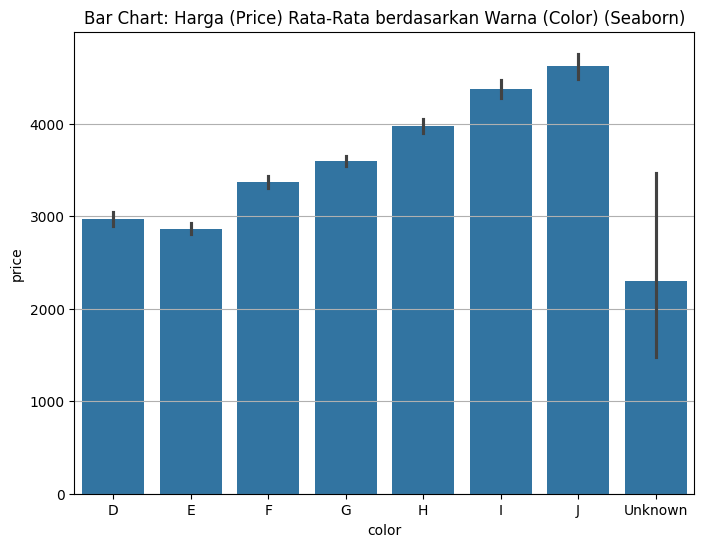

In [50]:
plt.figure(figsize=(8, 6))
sns.barplot(x='color', y='price', data=df_clean, order=['D', 'E', 'F', 'G', 'H', 'I', 'J', 'Unknown'])
plt.title('Bar Chart: Harga (Price) Rata-Rata berdasarkan Warna (Color)')
plt.grid(axis='y')
plt.show()

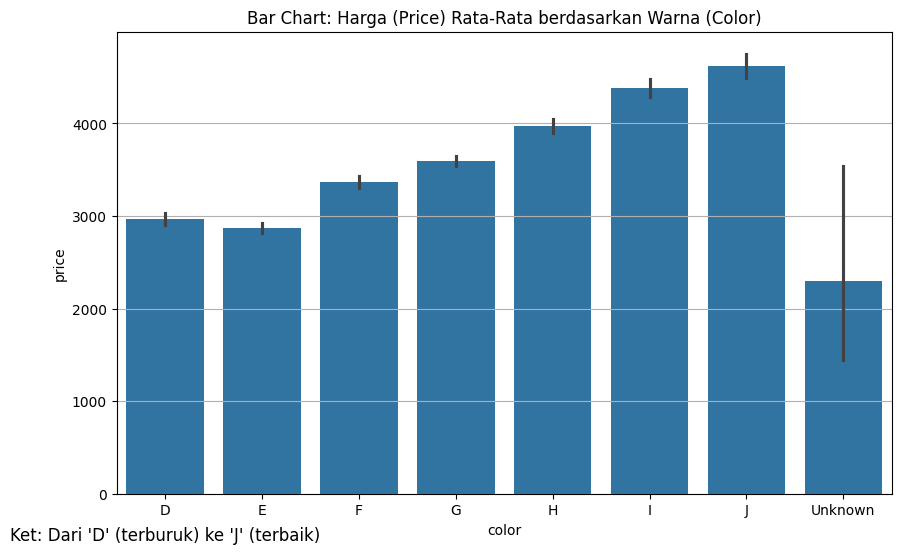

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x='color', y='price', data=df_clean, order=['D', 'E', 'F', 'G', 'H', 'I', 'J', 'Unknown'])
plt.title('Bar Chart: Harga (Price) Rata-Rata berdasarkan Warna (Color)')
plt.grid(axis='y')

# Menambahkan keterangan di bawah sumbu x
plt.text(0, -500, "Ket: Dari 'D' (terburuk) ke 'J' (terbaik)", ha='center', fontsize=12)

plt.show()

4. Heatmap

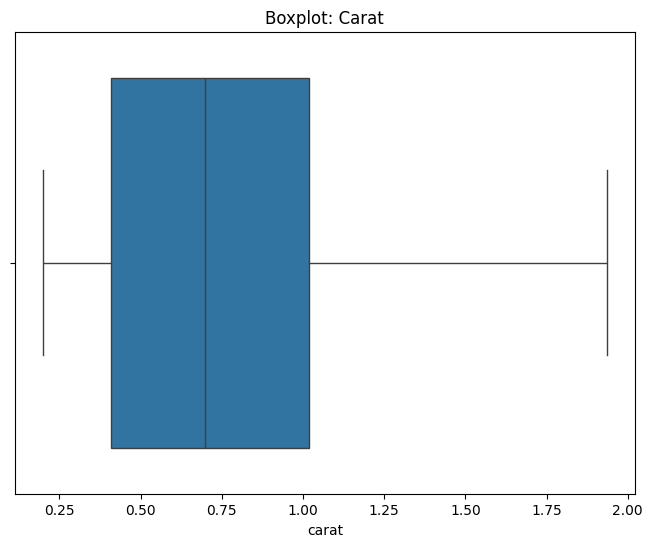

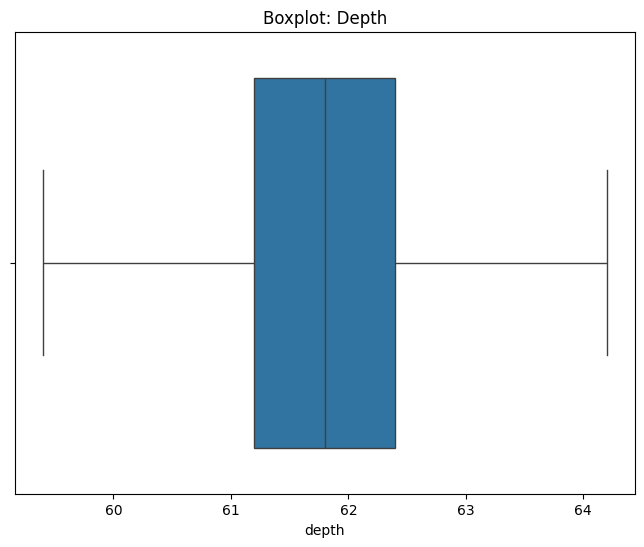

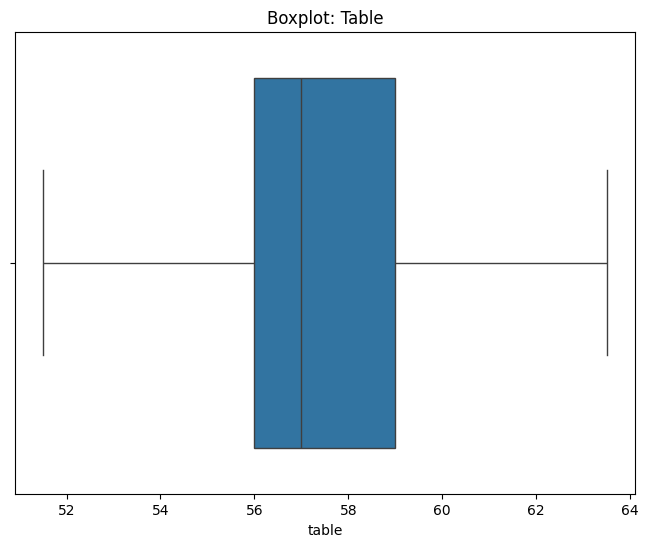

In [57]:
# Boxplot untuk kolom 'carat'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['carat'])
plt.title('Boxplot: Carat')
plt.show()

# Boxplot untuk kolom 'depth'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['depth'])
plt.title('Boxplot: Depth')
plt.show()

# Boxplot untuk kolom 'table'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['table'])
plt.title('Boxplot: Table')
plt.show()

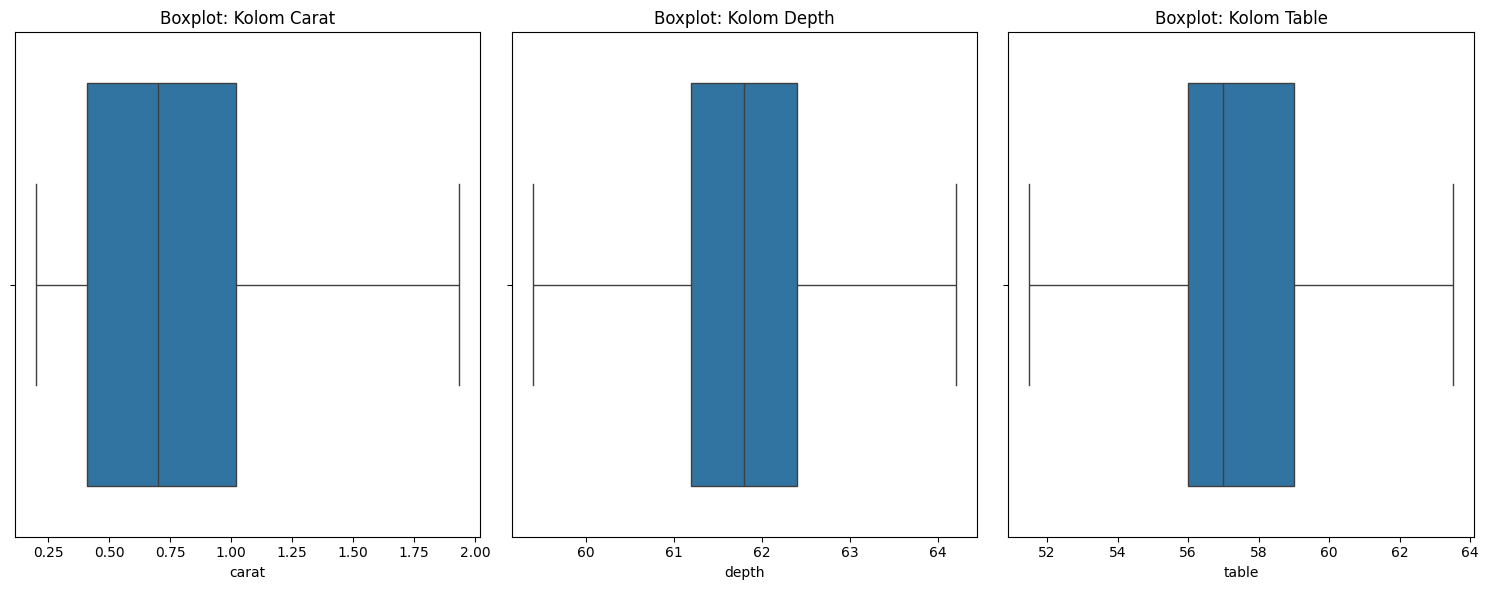

In [59]:
# Membuat figure dan axes untuk 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 6))  # 1 baris, 3 kolom

# Boxplot untuk kolom 'carat' pada subplot pertama
sns.boxplot(x=df_clean['carat'], ax=axes[0])
axes[0].set_title('Boxplot: Kolom Carat')

# Boxplot untuk kolom 'depth' pada subplot kedua
sns.boxplot(x=df_clean['depth'], ax=axes[1])
axes[1].set_title('Boxplot: Kolom Depth')

# Boxplot untuk kolom 'table' pada subplot ketiga
sns.boxplot(x=df_clean['table'], ax=axes[2])
axes[2].set_title('Boxplot: Kolom Table')

# Menampilkan plot
plt.tight_layout()  # Menyesuaikan layout agar tidak tumpang tindih
plt.show()

5. Heatmap

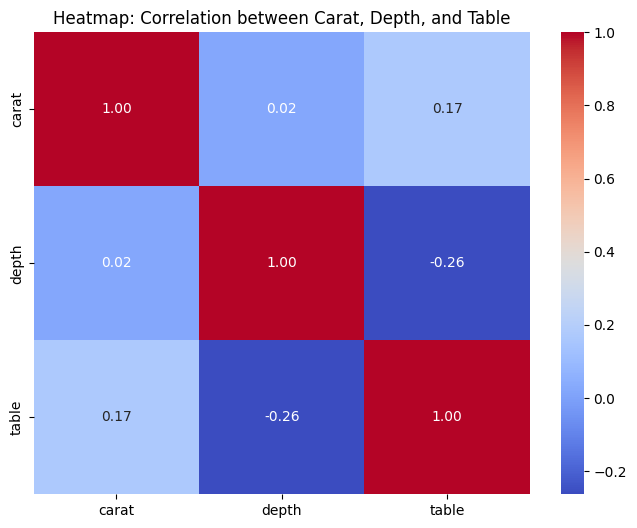

In [60]:
# Memilih kolom yang akan digunakan untuk heatmap
columns = ['carat', 'depth', 'table']
subset_df = df_clean[columns]

# Menghitung matriks korelasi
correlation_matrix = subset_df.corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # annot=True untuk menampilkan nilai korelasi
plt.title('Heatmap: Korelasi Antara Kolom Carat, Depth, and Table')
plt.show()

:::

## **7. Buat Grafik Multivariat (Data Bersih)**


### Memuat dataset yang sudah dibersihkan


In [ ]:
df_clean = pd.read_csv('diamonds_cleaned.csv')

### Ringkasan dataset yang sudah bersih (Statisika Deskrptif)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


## Penjelasan Output
Output di atas menunjukkan struktur dan isi dari dataset berlian setelah dibersihkan. Dataset ini tersimpan dalam format DataFrame, yang merupakan struktur data tabular yang umum digunakan dalam Python untuk menganalisis data.
- **Jumlah Data dan Kolom**: Dataset ini memiliki 53.940 baris data, yang artinya ada 53.940 berlian dalam dataset ini. Setiap baris mewakili satu berlian. Dataset ini juga memiliki 10 kolom, yaitu: carat, cut, color, clarity, depth, table, price, x, y, dan z. Setiap kolom merepresentasikan satu atribut atau karakteristik dari berlian.
- **Tipe Data**: Setiap kolom memiliki tipe data yang berbeda. Kolom seperti carat, depth, table, price, x, y, dan z memiliki tipe data numerik (float64), yang berarti berisi angka-angka desimal. Sedangkan kolom cut, color, dan clarity memiliki tipe data objek (object), yang berarti berisi data kategorikal seperti "Ideal", "Premium", "Good", dan sebagainya.
- **Data Bersih**: Setelah proses pembersihan data, tidak ada lagi nilai yang hilang (missing value) pada dataset ini. Artinya, semua data pada setiap kolom sudah lengkap.

In [ ]:
df_clean.head(100)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,57.0,326.0,3.95,3.98,3.53
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,2402.0,4.05,4.07,3.53
3,0.29,Premium,I,SI1,62.4,58.0,334.0,4.20,5.71,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
95,0.70,Ideal,E,SI1,57.5,58.0,2759.0,5.85,5.90,3.38
96,0.70,Good,F,VS1,59.4,62.0,2759.0,5.71,5.76,3.40
97,0.96,Fair,F,SI2,61.8,57.0,2759.0,6.27,5.95,4.07
98,0.73,Very Good,G,SI1,61.6,59.0,2760.0,5.77,5.78,3.56


In [ ]:
df_clean.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.787782,61.752629,57.410764,3783.221580,5.729240,5.732593,3.539017
std,0.449851,1.360745,2.117027,3790.921312,1.063814,1.061306,0.671336
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.410000,61.200000,56.000000,1021.000000,4.770000,4.780000,2.950000
50%,0.700000,61.800000,57.000000,2402.000000,5.700000,5.710000,3.530000
75%,1.020000,62.400000,59.000000,4950.250000,6.470000,6.470000,4.010000
max,5.010000,79.000000,79.000000,16738.000000,10.740000,31.800000,31.800000


### **A. Analisis Korelasi Antar Variabel Numerik Menggunakan Heatmap**

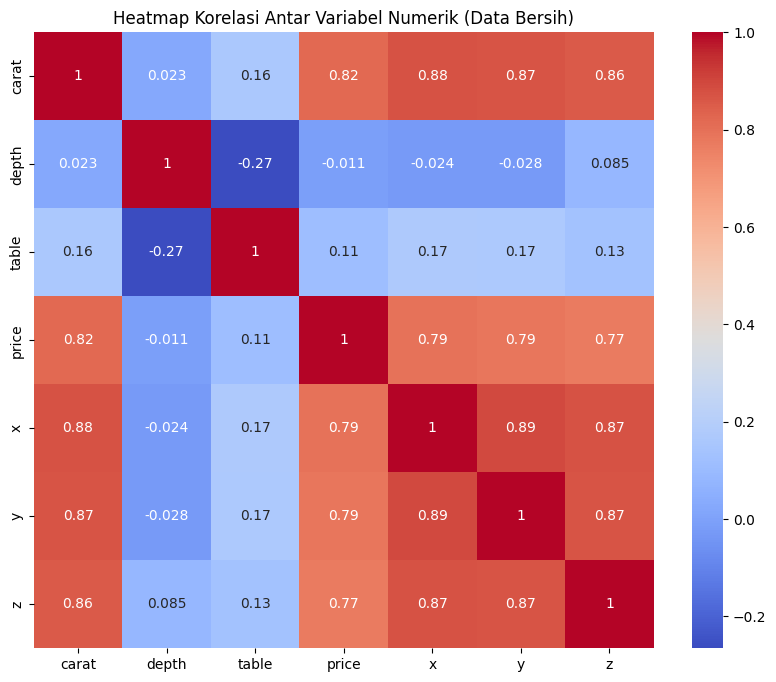

In [ ]:
# Pilih hanya kolom numerik untuk heatmap
numeric_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
correlation = df_clean[numeric_columns].corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Variabel Numerik (Data Bersih)")
plt.show()

## Penjelasan Output
**Tujuan Penggunaan Kode** :
Kode Python di atas digunakan untuk memvisualisasikan hubungan linear antara variabel-variabel numerik dalam dataset berlian yang telah dibersihkan. Heatmap merupakan salah satu cara yang efektif untuk melihat korelasi antara variabel-variabel tersebut dalam bentuk matriks.

Langkah-langkah yang dilakukan oleh kode:

1. **Pilih Kolom Numerik** :
  - `numeric_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']`: Baris ini memilih kolom-kolom yang memiliki tipe data numerik. Kolom-kolom ini akan digunakan untuk menghitung korelasi.
2. **Hitung Korelasi**:
  - `correlation = df_clean[numeric_columns].corr()`: Fungsi `corr()` dari ***pandas*** digunakan untuk menghitung matriks korelasi Pearson dari kolom-kolom numerik yang telah dipilih. Matriks korelasi ini menunjukkan seberapa kuat hubungan linear antara setiap pasangan variabel. Nilai korelasi berkisar antara -1 hingga 1:
    - Nilai mendekati 1: Korelasi positif yang kuat (semakin besar nilai satu variabel, semakin besar nilai variabel lainnya).
    - Nilai mendekati -1: Korelasi negatif yang kuat (semakin besar nilai satu variabel, semakin kecil nilai variabel lainnya).
    - Nilai mendekati 0: Tidak ada korelasi atau korelasi yang sangat lemah.
3. **Buat Heatmap**:
  - `sns.heatmap(correlation, annot=True, cmap='coolwarm')`: Fungsi heatmap dari library seaborn digunakan untuk membuat visualisasi matriks korelasi dalam bentuk heatmap.
    - `annot=True`: Menampilkan nilai korelasi pada setiap sel dalam heatmap.
    - `cmap='coolwarm'`: Menggunakan colormap 'coolwarm' untuk menunjukkan nilai korelasi positif (warna merah) dan negatif (warna biru).

**Interpretasi Hasil** :

Heatmap yang dihasilkan menunjukkan hubungan linear antara setiap pasangan variabel numerik. Semakin terang warna merah, semakin kuat korelasi positifnya, dan semakin terang warna biru, semakin kuat korelasi negatifnya.

**Contoh Hasil Interpretasi:**

- Jika terdapat kotak berwarna merah terang pada perpotongan antara kolom "`carat`" dan "`price`", maka dapat disimpulkan bahwa ada korelasi positif yang kuat antara berat berlian (carat) dan harganya. Artinya, semakin besar karat sebuah berlian, cenderung semakin tinggi harganya.
- Jika terdapat kotak berwarna biru terang pada perpotongan antara kolom "`depth`" dan "`price`", maka dapat disimpulkan bahwa ada korelasi negatif yang kuat antara kedalaman berlian dan harganya. Artinya, semakin dalam sebuah berlian, cenderung semakin rendah harganya (meskipun dalam konteks berlian, korelasi ini mungkin tidak terlalu intuitif dan perlu diinterpretasikan lebih lanjut).

**Perbedaan dengan Heatmap Data Kotor** :
Heatmap yang dihasilkan dari data yang telah dibersihkan akan memberikan hasil yang lebih akurat dan reliabel dibandingkan dengan heatmap dari data kotor. Hal ini karena:
- **Data yang Lengkap**: Data yang telah dibersihkan tidak memiliki nilai yang hilang, sehingga perhitungan korelasi akan lebih akurat.
- **Pengurangan Noise**: Proses pembersihan data dapat menghilangkan outlier atau data yang tidak relevan, sehingga mengurangi noise dalam data dan meningkatkan akurasi analisis korelasi.
- **Interpretasi yang Lebih Mudah**: Heatmap dari data bersih akan memberikan gambaran yang lebih jelas tentang hubungan antara variabel-variabel, karena tidak terpengaruh oleh data yang tidak valid.

**Manfaat Analisis Korelasi**:
- Memahami Hubungan Antar Variabel: Membantu memahami bagaimana variabel-variabel saling berhubungan.
- Memilih Fitur untuk Model: Membantu memilih fitur-fitur yang relevan untuk digunakan dalam model prediksi.
- Deteksi Multikolinearitas: Membantu mendeteksi adanya multikolinearitas, yaitu kondisi di mana dua atau lebih variabel independen sangat berkorelasi. Multikolinearitas dapat menyebabkan masalah dalam model regresi.

Dengan memahami hubungan antara variabel-variabel numerik, kita dapat membuat model prediksi yang lebih baik dan mengambil keputusan yang lebih informatif terkait dengan data berlian.

### **B. Pairplot Hubungan Antar Variabel Numerik: `carat`, `price`, dan `depth`, dengan Kategori `cut`**

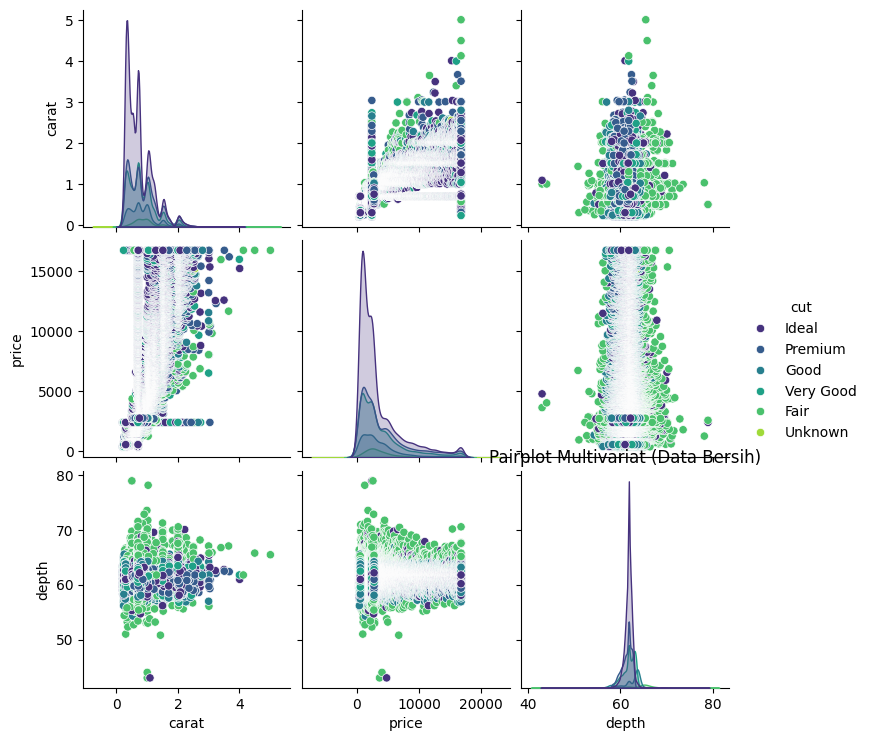

In [ ]:
sns.pairplot(df_clean, vars=['carat', 'price', 'depth'], hue='cut', palette='viridis')
plt.title("Pairplot Multivariat (Data Bersih)")
plt.show()

## Penjelasan Output
**Penjelasan Kode**:
- `sns.pairplot()`: Fungsi ini dari library Seaborn digunakan untuk membuat plot matriks yang menampilkan hubungan antara semua pasangan variabel numerik dalam dataset.
- `df_clean`: Ini adalah DataFrame yang berisi data berlian yang telah dibersihkan.
- `vars=['carat', 'price', 'depth']`: Parameter ini menentukan variabel-variabel numerik yang akan diplot. Dalam kasus ini, kita akan melihat hubungan antara '`carat`', '`price`', dan '`depth`'.
- `hue='cut'`: Parameter ini digunakan untuk mewarnai titik-titik data berdasarkan kategori '`cut`' (kualitas potongan berlian). Ini memungkinkan kita untuk melihat bagaimana kualitas potongan mempengaruhi hubungan antara variabel numerik lainnya.
- `palette='viridis'`: Parameter ini menentukan palet warna yang akan digunakan untuk mewarnai titik-titik data. Palet '`viridis`' adalah pilihan yang baik karena memberikan kontras yang baik antara kategori yang berbeda.
- `plt.title("Pairplot Multivariat")`: Memberikan judul pada plot.
- `plt.show()`: Menampilkan plot.

**Interpretasi Visualisasi**:

Plot yang dihasilkan oleh kode di atas adalah sebuah matriks plot yang terdiri dari beberapa subplot. Setiap subplot menunjukkan hubungan antara dua variabel numerik. Diagonal utama matriks berisi histogram dari setiap variabel, sedangkan subplot di luar diagonal menunjukkan scatter plot antara dua variabel.
- **Histogram** : Histogram menunjukkan distribusi frekuensi dari setiap variabel. Kita dapat melihat bentuk distribusi (misalnya, normal, miring), rentang nilai, dan adanya outlier.
- **Scatter Plot** : Scatter plot menunjukkan hubungan antara dua variabel numerik. Jika ada korelasi positif, titik-titik data cenderung membentuk garis naik dari kiri bawah ke kanan atas. Jika ada korelasi negatif, titik-titik data cenderung membentuk garis turun dari kiri atas ke kanan bawah. Jika tidak ada korelasi, titik-titik data tersebar secara acak.

**Apa yang Bisa Kita Pelajari dari Plot Ini?**
- Hubungan antara `Karat`, `Harga`, dan `Kedalaman`: Kita dapat melihat bagaimana variabel-variabel ini saling terkait. Misalnya, kita dapat melihat bahwa harga berlian cenderung meningkat seiring dengan peningkatan karat, tetapi ada juga variasi yang cukup besar.
- Pengaruh Kualitas Potongan: Dengan mewarnai titik-titik data berdasarkan kualitas potongan, kita dapat melihat bagaimana kualitas potongan mempengaruhi hubungan antara variabel-variabel lainnya. Misalnya, kita dapat melihat apakah berlian dengan kualitas potongan yang berbeda memiliki distribusi harga yang berbeda.
- Outlier: Kita dapat mengidentifikasi outlier, yaitu data yang jauh berbeda dari data lainnya. Outlier dapat memberikan informasi yang menarik atau menunjukkan adanya kesalahan dalam data.

**Contoh Interpretasi**:
- **Karat vs. Harga** : Semakin besar karat sebuah berlian, cenderung semakin tinggi harganya. Ini terlihat dari kecenderungan titik-titik data untuk membentuk garis naik dari kiri bawah ke kanan atas pada subplot yang menunjukkan hubungan antara karat dan harga.
- **Kedalaman vs. Harga**: Tidak ada hubungan yang jelas antara kedalaman dan harga. Titik-titik data tersebar secara acak pada subplot yang menunjukkan hubungan antara kedalaman dan harga.
- **Pengaruh Kualitas Potongan** : Berlian dengan kualitas potongan "`Ideal`" cenderung memiliki harga yang lebih tinggi dibandingkan dengan kualitas potongan lainnya. Ini terlihat dari distribusi titik-titik data pada subplot yang menunjukkan hubungan antara kualitas potongan dan harga.

**Kesimpulan**

Pairplot adalah alat yang sangat berguna untuk mengeksplorasi hubungan antara beberapa variabel numerik dalam dataset. Dengan visualisasi ini, kita dapat dengan cepat mendapatkan gambaran umum tentang data dan mengidentifikasi pola-pola yang menarik.

**Perbedaan Visualisasi Data Bersih dan Data Kotor**

Visualisasi menggunakan data yang telah dibersihkan (cleansed) akan memberikan gambaran yang lebih akurat dan jelas mengenai hubungan antara variabel-variabel dibandingkan dengan data yang masih kotor (mengandung banyak missing value). Berikut adalah beberapa perbedaan yang mungkin terjadi:
1. **Densitas Titik**:
  - Data Kotor: Pada visualisasi data kotor, seringkali terdapat banyak titik data yang tersebar secara acak atau membentuk pola yang tidak jelas. Hal ini disebabkan oleh adanya missing value yang dapat mengganggu pola sebenarnya dalam data.
  - Data Bersih: Setelah data dibersihkan, titik-titik data akan lebih terkonsentrasi pada area-area tertentu, membentuk pola yang lebih jelas dan mencerminkan hubungan sebenarnya antara variabel-variabel.
2. **Distribusi Variabel**:
  - Data Kotor: Histogram pada diagonal utama pairplot dari data kotor mungkin menunjukkan distribusi yang tidak normal atau memiliki outlier yang ekstrim. Hal ini dapat disebabkan oleh adanya nilai-nilai yang tidak masuk akal atau missing value yang digantikan dengan nilai imputasi yang tidak tepat.
  - Data Bersih: Histogram pada data bersih cenderung menunjukkan distribusi yang lebih normal dan wajar. Outlier yang ekstrim juga akan berkurang, sehingga distribusi data menjadi lebih representatif.
3. **Hubungan Antar Variabel**:
  - Data Kotor: Scatter plot pada data kotor mungkin menunjukkan hubungan yang tidak jelas atau bahkan menyesatkan. Missing value dapat menyebabkan hubungan antara variabel tampak lebih lemah atau lebih kuat daripada sebenarnya.
  - Data Bersih: Scatter plot pada data bersih akan memberikan gambaran yang lebih akurat mengenai hubungan antara variabel-variabel. Korelasi antara variabel akan lebih jelas terlihat, baik itu korelasi positif, negatif, atau tidak ada korelasi.
4. **Interpretasi**:
  - Data Kotor: Kesimpulan yang diambil dari visualisasi data kotor mungkin tidak akurat atau menyesatkan. Hal ini karena adanya noise (gangguan) dalam data akibat missing value.
  - Data Bersih: Visualisasi data bersih memungkinkan kita untuk membuat interpretasi yang lebih valid dan dapat diandalkan mengenai hubungan antara variabel-variabel.
  
Secara umum, visualisasi data yang telah dibersihkan akan memberikan informasi yang lebih relevan dan akurat dibandingkan dengan data yang masih kotor. Hal ini karena data yang bersih telah melalui proses pembersihan untuk menghilangkan missing value, outlier, dan inkonsistensi lainnya yang dapat mengganggu analisis.

### **C. Boxplot Harga Berlian (`price`) Berdasarkan Kategori `cut`**

<ipython-input-25-545ad09f263a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y='price', data=df_clean, palette='Set3')


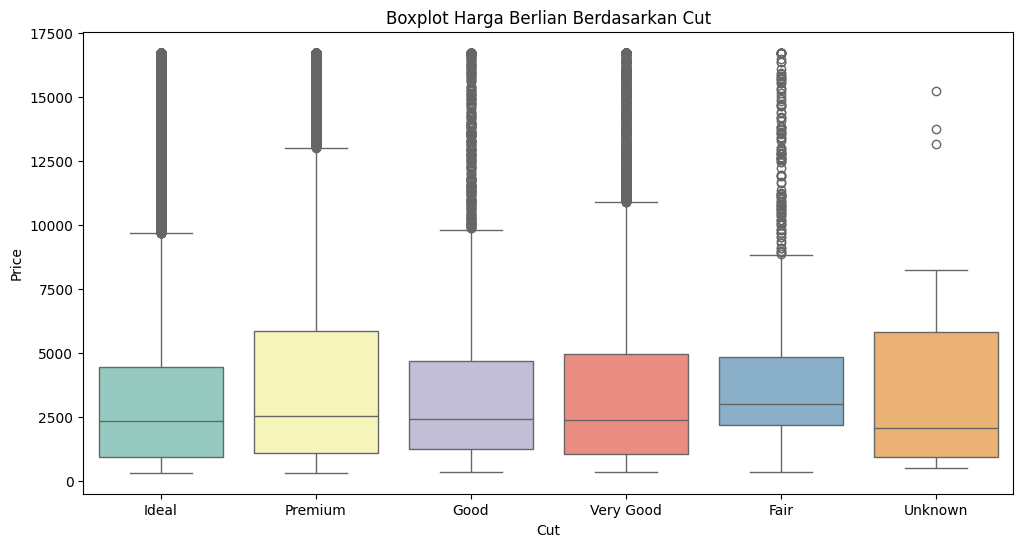

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cut', y='price', data=df_clean, palette='Set3')
plt.title("Boxplot Harga Berlian Berdasarkan Cut")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

## Penjelasan Output
**Penjelasan Kode**:
- `plt.figure(figsize=(12, 6))`: Membuat figure dengan ukuran 12 inci x 6 inci untuk menampilkan plot.
- `sns.boxplot(x='cut', y='price', data=df_clean, palette='Set3')`:
  - ` x='cut'`: Menentukan variabel '`cut`' sebagai sumbu x (kategorikal).
  - `y='price'`: Menentukan variabel '`price`' sebagai sumbu y (numerik).
  - `data=df_clean`: Menggunakan DataFrame '`df_clean`' sebagai sumber data.
  - `palette='Set3'`: Menggunakan palet warna '`Set3`' untuk memberikan warna yang menarik pada boxplot.
- `plt.title("Boxplot Harga Berlian Berdasarkan Cut")`: Memberikan judul pada plot.
- `plt.xlabel("Cut")`: Memberikan label pada sumbu `x`.
- `plt.ylabel("Price")`: Memberikan label pada sumbu `y`.
- `plt.show()`: Menampilkan plot.

**Interpretasi Boxplot**:

Boxplot di atas memberikan gambaran yang jelas tentang distribusi harga berlian untuk setiap kategori kualitas potongan. Berikut beberapa poin penting yang bisa kita ambil:
- **Median Harga**: Garis tengah pada setiap kotak mewakili median harga. Kita dapat melihat bahwa secara umum, berlian dengan kualitas potongan "`Ideal`" dan "`Premium`" memiliki median harga yang lebih tinggi dibandingkan dengan kualitas potongan lainnya.
- **Rentang Antar Kuartil (IQR)**: Kotak pada boxplot merepresentasikan rentang interkuartil (IQR), yaitu rentang antara kuartil pertama (25%) dan kuartil ketiga (75%). Semakin lebar kotak, semakin besar variabilitas harga dalam kategori tersebut.
- **Outlier**: Titik-titik yang berada di luar "whisker" (garis-garis vertikal yang memanjang dari kotak) dianggap sebagai outlier. Outlier ini menunjukkan adanya harga berlian yang jauh di atas atau di bawah harga rata-rata untuk kategori tersebut.
- **Perbandingan Kategori**: Dengan membandingkan boxplot antar kategori, kita dapat melihat bahwa ada perbedaan yang signifikan dalam distribusi harga berlian berdasarkan kualitas potongannya. Berlian dengan kualitas potongan "Ideal" cenderung memiliki harga yang lebih tinggi dan lebih sedikit outlier dibandingkan dengan kualitas potongan lainnya.

**Perbedaan dengan Visualisasi Data Kotor**:

Jika kita membandingkan boxplot ini dengan boxplot yang dibuat dari data yang belum dibersihkan (masih banyak missing value), kita akan menemukan beberapa perbedaan signifikan:
- Distribusi yang Lebih Jelas: Pada data yang telah dibersihkan, distribusi harga untuk setiap kategori "`cut`" akan lebih jelas terlihat. Tidak akan ada banyak titik data yang tersebar secara acak atau membentuk pola yang tidak jelas.
- Outlier yang Lebih Sedikit: Jumlah outlier pada data yang telah dibersihkan cenderung lebih sedikit. Hal ini karena missing value atau data yang tidak valid telah dihilangkan.
- Representasi yang Lebih Akurat: Visualisasi data yang telah dibersihkan memberikan representasi yang lebih akurat mengenai hubungan antara kualitas potongan dan harga berlian.

**Kesimpulan** :

Boxplot yang dihasilkan dari data yang telah dibersihkan memberikan informasi yang lebih jelas dan akurat mengenai distribusi harga berlian berdasarkan kualitas potongannya. Dengan melihat boxplot ini, kita dapat menarik kesimpulan bahwa kualitas potongan memiliki pengaruh yang signifikan terhadap harga berlian. Berlian dengan kualitas potongan yang lebih baik cenderung memiliki harga yang lebih tinggi dan distribusi harga yang lebih sempit.

### **D. 3D Scatterplot: Carat vs Price vs Depth**

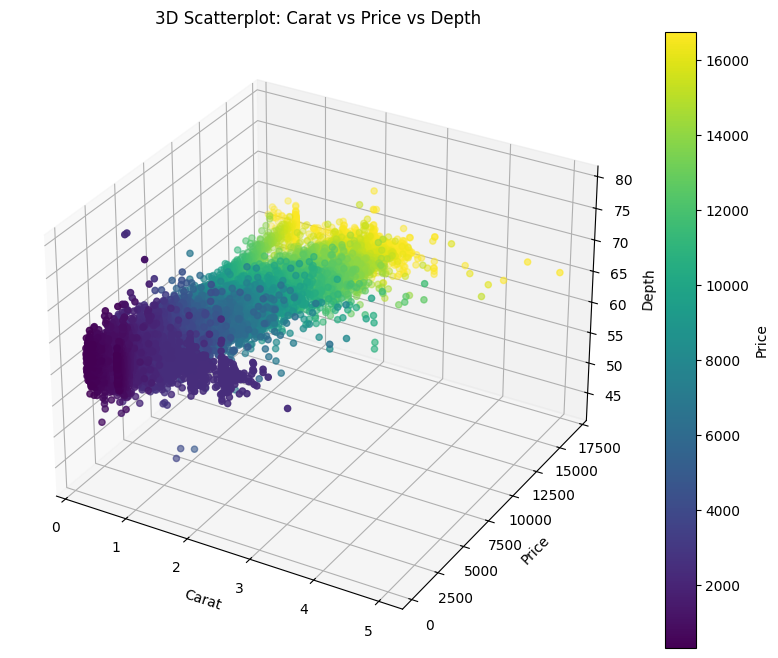

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_clean['carat'], df_clean['price'], df_clean['depth'], c=df_clean['price'], cmap='viridis')
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
ax.set_zlabel('Depth')
plt.title("3D Scatterplot: Carat vs Price vs Depth")
plt.colorbar(scatter, label="Price")
plt.show()

## Penjelasan Output
**Memahami Kodenya**
1. **Import Modul**:
  - `from mpl_toolkits.mplot3d import Axes3D`: Ini seperti kita mengambil kotak peralatan khusus untuk membuat gambar 3D. Kotak peralatan ini bernama **Axes3D**.
2. **Buat Gambar**:
  - `fig = plt.figure(figsize=(10, 8))`: Kita membuat sebuah kertas kosong (figure) berukuran 10x8 inci untuk menggambar.
3. **Buat Sumbu 3D**:
  - `ax = fig.add_subplot(111, projection='3d')`: Di atas kertas kosong, kita buat sebuah area 3D untuk menggambar. Area ini memiliki tiga sumbu: sumbu `X` untuk berat (`carat`), sumbu `Y` untuk `harga`, dan sumbu `Z` untuk `kedalaman`.
4. **Tambahkan Titik-Titik**:
  - `scatter = ax.scatter(df_clean['carat'], df_clean['price'], df_clean['depth'], c=df_clean['price'], cmap='viridis')`: Ini adalah bagian terpenting. Kita mengambil data dari dataset ini (`df_clean`) dan membuat titik-titik di dalam area 3D. Setiap titik mewakili satu berlian. Warna setiap titik ditentukan oleh harganya.
5. **Beri Label**:
  - `ax.set_xlabel('Carat'), ax.set_ylabel('Price'), ax.set_zlabel('Depth')`: Kita memberi label pada setiap sumbu agar kita tahu sumbu mana yang mewakili apa.
6. **Tampilkan Gambar**:
  - `plt.show()`: Setelah semua titik dan label ditambahkan, kita menampilkan gambar 3D tersebut di layar.

**Interpretasi Hasil Visualisasi 3D Scatterplot**

Visualisasi 3D scatterplot yang kita buat memberikan gambaran yang sangat baik tentang hubungan antara tiga variabel utama pada berlian, yaitu carat (berat), price (harga), dan depth (kedalaman). Berikut beberapa interpretasi yang bisa kita tarik dari visualisasi tersebut:
- **Korelasi Positif Antara Carat dan Harga**: Secara umum, kita akan melihat kecenderungan bahwa semakin besar carat (berat) sebuah berlian, maka semakin tinggi pula harganya. Ini ditunjukkan oleh titik-titik data yang cenderung naik ke atas seiring dengan bertambahnya nilai pada sumbu carat.
- **Hubungan Antara Kedalaman dan Harga**: Kedalaman berlian juga memiliki pengaruh terhadap harga, namun hubungannya mungkin tidak selinier dengan carat. Beberapa berlian dengan kedalaman tertentu mungkin memiliki harga yang lebih tinggi dibandingkan dengan berlian lain yang memiliki kedalaman yang sama tetapi carat yang berbeda.
- **Kelompok-Kelompok Berlian**: Kita mungkin menemukan kelompok-kelompok berlian yang memiliki karakteristik yang sama. Misalnya, ada kelompok berlian dengan carat kecil namun harga tinggi, yang mungkin mengindikasikan kualitas atau keunikan lainnya pada berlian tersebut.
- **Outlier**: Titik-titik data yang jauh dari kelompok utama disebut outlier. Outlier ini bisa mewakili berlian dengan karakteristik yang sangat unik atau mungkin merupakan kesalahan data.


**Perbedaan Visualisasi Data Kotor dan Data Bersih**:
1. **Distribusi Titik Data**:
  - **Visualisasi Data Bersih** : Titik-titik data cenderung lebih terkonsentrasi dalam suatu pola yang jelas, menunjukkan hubungan yang lebih kuat antara carat, harga, dan kedalaman.
  - **Visualisasi Data Kotor**: Titik-titik data terlihat lebih tersebar dan tidak membentuk pola yang jelas. Ada banyak titik data yang seolah-olah terpisah dari kelompok utama. Ini mengindikasikan adanya lebih banyak noise atau variasi acak dalam data.
2. **Outlier**:
  - **Visualisasi Data Bersih**: Jumlah outlier (titik data yang jauh dari kelompok utama) cenderung lebih sedikit.
  - V**Visualisasi Data Kotor**: Jumlah outlier terlihat lebih banyak. Ini bisa disebabkan oleh beberapa faktor, seperti kesalahan dalam pengukuran data, adanya berlian dengan karakteristik yang sangat unik, atau memang adanya variasi yang sangat besar dalam data.
3. **Warna**:
  - **Visualisasi Data Bersih**: Warna pada titik data mungkin menunjukkan gradien yang lebih halus, mencerminkan variasi harga yang lebih kontinu.
  - **Visualisasi Data Kotor**: Warna pada titik data mungkin terlihat lebih bervariasi dan kurang konsisten, menunjukkan adanya lebih banyak variasi dalam harga untuk kombinasi carat dan kedalaman yang sama.
4. **Interpretasi**:
  - Visualisasi Data yang belum di cleansing menunjukkan data yang lebih "kotor" mengindikasikan adanya lebih banyak noise atau variasi acak dalam data. Hal ini bisa disebabkan oleh beberapa faktor, seperti:
    - Kesalahan Pengukuran: Ada kemungkinan terjadi kesalahan dalam pengukuran carat, harga, atau kedalaman berlian.
    - Variasi Kualitas yang Lebih Besar: Data mungkin mencakup berlian dengan berbagai kualitas yang sangat berbeda, sehingga sulit untuk melihat pola yang jelas.
    - Faktor Lain yang Tidak Diperhitungkan: Mungkin ada faktor lain yang mempengaruhi harga berlian yang tidak dimasukkan dalam analisis ini, seperti sertifikasi, bentuk, atau warna.


Visualisasi data bersih memberikan gambaran yang lebih jelas tentang hubungan antara carat, harga, dan kedalaman berlian. Namun, visualisasi data kotor menunjukkan bahwa dalam dunia nyata, data seringkali tidak sempurna dan mengandung noise. Memahami perbedaan antara kedua visualisasi ini akan membantu kita dalam melakukan analisis data yang lebih baik dan membuat keputusan yang lebih informatif.


# Kesimpulan
1. **Pemahaman Dataset**:

  Dataset terdiri dari atribut seperti berat (`carat`), harga (`price`), `dimensi`, dan kualitas seperti `cut`, `color`, dan `clarity`. Setelah dilakukan pembersihan data, missing values berhasil diatasi untuk meningkatkan kualitas analisis.

2. **Kesimpulan tentang Visualisasi Terbaik**
  - **Heatmap Korelasi**:
    - Kelebihan: Memvisualisasikan hubungan antar variabel numerik secara langsung. Sangat efektif untuk mengidentifikasi korelasi positif atau negatif dengan cepat.
    - Kekurangan: Tidak memberikan detail tentang distribusi data atau pengaruh kategori.
  - **Pairplot**:
    - Kelebihan: Memberikan pandangan komprehensif tentang hubungan antar variabel numerik, sekaligus menampilkan distribusi data untuk setiap variabel. Berguna untuk melihat pola umum dan variasi dalam data.
    - Kekurangan: Kurang jelas ketika berhadapan dengan dataset besar karena terlalu banyak titik data yang bertumpuk.
  - **Boxplot**:
    - Kelebihan: Ideal untuk memahami distribusi data numerik berdasarkan kategori, seperti harga berlian berdasarkan kualitas potongan (`cut`). Mudah untuk mendeteksi outlier.
    - Kekurangan: Tidak menunjukkan hubungan antar variabel numerik secara langsung.
  - **Scatterplot 3D**:
    - Kelebihan: Visualisasi 3D memberikan perspektif mendalam tentang hubungan tiga variabel sekaligus, memungkinkan identifikasi kluster atau outlier secara visual.
    - Kekurangan: Sulit dipahami untuk pembaca awam, terutama jika data terlalu padat atau tidak diwarnai dengan baik.

  **Visualisasi Terbaik**:

  Boxplot dipilih sebagai visualisasi terbaik karena:
  - Secara jelas menunjukkan perbedaan distribusi harga berlian berdasarkan kategori kualitas potongan (`cut`).
  - Mudah dipahami dan langsung menyoroti informasi penting seperti median, IQR, dan outlier.
  - Membantu menghubungkan atribut kategorikal dengan nilai numerik, yang relevan untuk analisis harga berlian.

**Kesimpulan Utama**:
- Berlian dengan carat yang lebih besar dan kualitas potongan terbaik memiliki harga tertinggi.
- Kategori seperti `cut`, `color`, dan `clarity` memberikan kontribusi signifikan terhadap variasi `harga` berlian.
- Nilai outlier ditemukan pada beberapa atribut, yang dapat memengaruhi analisis lebih lanjut.

**Refleksi** : Tugas ini membantu untuk memahami pentingnya pembersihan data dalam analisis, penggunaan visualisasi untuk menggali pola dalam dataset, dan mengidentifikasi variabel yang paling signifikan dalam memengaruhi hasil (analisis multivariat).

## **8. Implementasi Model dan Algoritma Sederhana**


### **1. Persiapan Data**



**Muat dataset yang telah dibersihkan:**


In [ ]:
df_clean = pd.read_csv('diamonds_cleaned.csv')
df_clean

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,57.0,326.0,3.95,3.98,3.53
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,2402.0,4.05,4.07,3.53
3,0.29,Premium,I,SI1,62.4,58.0,334.0,4.20,5.71,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,61.8,57.0,2757.0,5.75,5.76,3.50
53936,0.70,Good,D,SI1,63.1,57.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,5.71,3.74


**Ubah variabel kategorikal menjadi numerik menggunakan one-hot encoding:**


In [ ]:
df_encoded = pd.get_dummies(df_clean, columns=['cut', 'color', 'clarity'], drop_first=True)

**Pisahkan fitur (X) dan target (y):**


In [ ]:
x = df_encoded.drop('price', axis=1)
y = df_encoded['price']

**Bagi data menjadi data training dan data testing:**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **2. Implementasi Model**



**Buat objek model Linear Regression:**


In [ ]:
model = LinearRegression()

**Latih model dengan data training:**


In [ ]:
model.fit(X_train, y_train)

LinearRegression()

### **3. Evaluasi Model**



**Lakukan prediksi pada data testing:**


In [ ]:
y_pred = model.predict(X_test)

**Hitung metrik evaluasi:**


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 3560172.059583262
R-squared (R2): 0.7515297801671946


**Alasan Memilih Linear Regression:**

* **Sederhana dan mudah diinterpretasi**: Linear Regression adalah algoritma yang relatif sederhana dan mudah dipahami, cocok untuk implementasi awal.
* **Data memiliki hubungan linear**: Dari EDA, terlihat bahwa beberapa fitur memiliki korelasi linear dengan harga, sehingga Linear Regression bisa menjadi pilihan yang baik.
* **Performa yang cukup baik untuk data ini**: Linear Regression seringkali memberikan performa yang cukup baik untuk kasus prediksi harga, terutama jika data memiliki hubungan linear.